In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models import *   
import load_data
import nan_imputation
import helpers
from helpers import find_repo_root

In [7]:
# Reload isdead.py
import importlib
importlib.reload(load_data)
importlib.reload(nan_imputation)
importlib.reload(helpers)

<module 'helpers' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/helpers.py'>

## Step 0 : Load the Data

In [10]:
repo_root = find_repo_root()
repo_root

data_path = os.path.join(repo_root, 'Data/Lifespan')

In [11]:
worms = load_data.load_lifespan(data_path)
#worms.pop("worm_1_companyDrug", None)  # The second argument avoids KeyError if the key doesn't exist

FileNotFoundError: [Errno 2] No such file or directory: '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/Data/Lifespan/Lifespan/control'

In [5]:
# just a check print on worm 3 (companyDrug)
worm_name = 'worm_3'  # Change this to the name of the worm you want to print
print(f"Worm: {worm_name}")
worm_data = worms[worm_name]
df = pd.DataFrame(worm_data.T, columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category'])
print(df)

Worm: worm_3
         Frame      Speed           X           Y  Changed Pixels  Category
0          1.0   5.529672  458.251429  354.988571            82.0       0.0
1          2.0   1.527255  514.288889  346.877778            21.0       0.0
2          3.0   4.919128  513.591716  347.189349            62.0       0.0
3          4.0  10.049464  511.406250  348.317708           123.0       0.0
4          5.0   5.164264  506.500000  349.402439            89.0       0.0
...        ...        ...         ...         ...             ...       ...
64789  10795.0   0.000000  430.440895  244.827476             0.0       0.0
64790  10796.0   0.000000  430.440895  244.827476             0.0       0.0
64791  10797.0   0.390366  430.440895  244.827476             4.0       0.0
64792  10798.0   0.687622  430.365079  244.647619            12.0       0.0
64793  10799.0   0.889387  430.200000  244.346032            31.0       0.0

[64794 rows x 6 columns]


In [6]:
helpers.print_fdict_summary(worms)  

# need to calibrate : 
#companyDrug :
# 1 : 53995
# 2 : 75594
# 3 : 75594
# 4 : 75594
# 5 : 75594
# 6 : 64795
# 21 : 75594
# 22 : 75594
# 23 : 75594
# 24 : 75594
# 25 : 75594
# 26 : 75594
# 
#  control :
# 11 : 75594
# 12 : 75594
# 13 : 75594
# 14 : 75594 
# 15 : 64795
# 16 : 75594
# 31 : 53996
# 32 : 75594
# 33 : 53996
# 34 : 53996
# 35 : 75594
# 36 : 75594


Summary of Loaded Worm Data:
Worm: worm_1
  Shape: (6, 75593)
----------------------------------------
Worm: worm_2
  Shape: (6, 75593)
----------------------------------------
Worm: worm_3
  Shape: (6, 64794)
----------------------------------------
Worm: worm_4
  Shape: (6, 75593)
----------------------------------------
Worm: worm_5
  Shape: (6, 75593)
----------------------------------------
Worm: worm_6
  Shape: (6, 75593)
----------------------------------------
Worm: worm_7
  Shape: (6, 75593)
----------------------------------------
Worm: worm_8
  Shape: (6, 75593)
----------------------------------------
Worm: worm_9
  Shape: (6, 75593)
----------------------------------------
Worm: worm_10
  Shape: (6, 53995)
----------------------------------------
Worm: worm_11
  Shape: (6, 75593)
----------------------------------------
Worm: worm_12
  Shape: (6, 75593)
----------------------------------------
Worm: worm_13
  Shape: (6, 75593)
----------------------------------------
Worm

## Step 1 : NaN imputation
> impute only on X and Y columns since only where there are NaN

In [7]:
for name, lifespan_array in worms.items(): 
    print(f"Processing {name}")
    lifespan_arrayxy = lifespan_array[2:4,:]  # Extract columns for X and Y
    missing_sequences = nan_imputation.count_successive_missing(lifespan_arrayxy)
    for start, end, length in missing_sequences:
        print(f"  Missing sequence starts at column {start}, ends at column {end - 1}, length: {length}")

Processing worm_1
  Missing sequence starts at column 4691, ends at column 4709, length: 19
  Missing sequence starts at column 7386, ends at column 7444, length: 59
  Missing sequence starts at column 7449, ends at column 7467, length: 19
  Missing sequence starts at column 9899, ends at column 9908, length: 10
  Missing sequence starts at column 9972, ends at column 9994, length: 23
  Missing sequence starts at column 11698, ends at column 11704, length: 7
  Missing sequence starts at column 11709, ends at column 11749, length: 41
  Missing sequence starts at column 11766, ends at column 11772, length: 7
  Missing sequence starts at column 11811, ends at column 11827, length: 17
  Missing sequence starts at column 11836, ends at column 11857, length: 22
  Missing sequence starts at column 14592, ends at column 14602, length: 11
  Missing sequence starts at column 14617, ends at column 14629, length: 13
  Missing sequence starts at column 14829, ends at column 14830, length: 2
Process

In [8]:
#print(lifespan_arrayxy)
print(f"Missing sequences for {name}: {missing_sequences}")

Missing sequences for worm_24: [(2699, 2852, 153), (6622, 6637, 15), (6696, 6729, 33), (6900, 6929, 29), (7063, 7078, 15), (7082, 7095, 13), (7174, 7200, 26), (8405, 8419, 14), (8476, 8481, 5), (8999, 9236, 237), (9860, 9900, 40), (11855, 11884, 29), (12598, 12620, 22), (12777, 12790, 13), (12889, 12941, 52), (12996, 13104, 108), (13174, 13228, 54), (13412, 13543, 131), (15600, 16199, 599), (19208, 19221, 13), (19238, 19539, 301), (19798, 19829, 31), (19861, 19931, 70), (19966, 20624, 658)]


In [9]:
# Rows to check for missing values (2:4 in zero-based indexing)
rows_to_check = slice(2, 4)  # Rows 2 and 3 not row 4

# Apply cut_array to each worm in the dataset
cut_nan_dict = {name: nan_imputation.cut_array(array, rows_to_check) for name, array in worms.items()}

In [10]:
# Print the shape of the filtered arrays
for name, item in cut_nan_dict.items():
    print(f'{name} : {item.shape}')

worm_1 : (6, 75343)
worm_2 : (6, 74855)
worm_3 : (6, 64534)
worm_4 : (6, 74307)
worm_5 : (6, 75395)
worm_6 : (6, 75593)
worm_7 : (6, 74496)
worm_8 : (6, 72844)
worm_9 : (6, 73638)
worm_10 : (6, 53811)
worm_11 : (6, 74689)
worm_12 : (6, 73516)
worm_13 : (6, 74414)
worm_14 : (6, 53396)
worm_15 : (6, 52787)
worm_16 : (6, 74062)
worm_17 : (6, 72595)
worm_18 : (6, 64759)
worm_19 : (6, 70217)
worm_20 : (6, 72216)
worm_21 : (6, 71822)
worm_22 : (6, 52217)
worm_23 : (6, 75159)
worm_24 : (6, 72932)


In [11]:
# just a check print --> If we check we do have the number of frames decreased (because NaNs where removed) --> example with worm_3
worm_name = 'worm_3'  # Change this to the name of the worm you want to print
print(f"Worm: {worm_name}")
worm_data = cut_nan_dict[worm_name]
df = pd.DataFrame(worm_data.T, columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category'])

# Check for NaN values in the DataFrame
if df.isna().sum().sum() == 0:
    print(f"Worm {worm_name} has no NaN values after NaN imputation.")
else:
    print(f"Worm {worm_name} still contains NaN values.")

df

#And we see that the total number of frames is decreased 

Worm: worm_3
Worm worm_3 has no NaN values after NaN imputation.


,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,5.529672,458.251429,354.988571,82.0,0.0
1,2.0,1.527255,514.288889,346.877778,21.0,0.0
2,3.0,4.919128,513.591716,347.189349,62.0,0.0
3,4.0,10.049464,511.406250,348.317708,123.0,0.0
4,5.0,5.164264,506.500000,349.402439,89.0,0.0
...,...,...,...,...,...,...
64529,10795.0,0.000000,430.440895,244.827476,0.0,0.0
64530,10796.0,0.000000,430.440895,244.827476,0.0,0.0
64531,10797.0,0.390366,430.440895,244.827476,4.0,0.0
64532,10798.0,0.687622,430.365079,244.647619,12.0,0.0


# Step 2 : Figure out when do the worms die
>When we find out on which frame he dies, drop the frames after his death

In [12]:
import isdead
importlib.reload(isdead)

<module 'isdead' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/isdead.py'>

In [13]:
movement_threshold = 1.0 # Threshold for inactivity detection
processed_worms = {} # Dictionary to store processed worms

dying_times = []

# Use the cleaned data from nan_imputation
cleaned_worms = cut_nan_dict  # Replace with the variable holding your cleaned data

# Iterate through each worm in the dataset
for worm_name, worm_data in cleaned_worms.items():
    print(f"Processing {worm_name}...")
    # Transpose worm_data for DataFrame creation
    df_worm = pd.DataFrame(worm_data.T,columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category']) # Transpose the array

    result = isdead.estimate_dying_time(df_worm, movement_threshold) # Use the estimate_dying_time function to find the dying frame
    if result[0] is None:
        print(f"  {worm_name}: No inactivity detected. Retaining all data.")
        processed_worms[worm_name] = worm_data
        continue

    dying_frame, absolute_frame, dying_time_hours, segment_number = result
  
    dying_times.append(dying_time_hours) # Append dying time in hours to the list

    print(f"  {worm_name}: Dying frame = {dying_frame} of Segment = {segment_number}, Absolute frame = {absolute_frame}, Dying time = {dying_time_hours:.2f} hours") # Print details

    # Truncate the data up to the dying frame
    truncated_data = worm_data[:, worm_data[0, :] <= dying_frame]
    processed_worms[worm_name] = truncated_data

# Print summary of processed worms
print("\nSummary of processed worms:")
for name, data in processed_worms.items():
    print(f"{name}: Original frames = {worms[name].shape[1]}, After truncation = {data.shape[1]}")

Processing worm_1...
  worm_1: Dying frame = 5776.0 of Segment = 6, Absolute frame = 70320, Dying time = 468.07 hours
Processing worm_2...
  worm_2: Dying frame = 10694.0 of Segment = 6, Absolute frame = 74750, Dying time = 498.03 hours
Processing worm_3...
  worm_3: Dying frame = 10406.0 of Segment = 5, Absolute frame = 64141, Dying time = 426.13 hours
Processing worm_4...
  worm_4: Dying frame = 9461.0 of Segment = 6, Absolute frame = 72969, Dying time = 486.04 hours
Processing worm_5...
  worm_5: Dying frame = 10754.0 of Segment = 6, Absolute frame = 75350, Dying time = 498.36 hours
Processing worm_6...
  worm_6: Dying frame = 8202.0 of Segment = 6, Absolute frame = 72996, Dying time = 486.05 hours
Processing worm_7...
  worm_7: Dying frame = 10742.0 of Segment = 6, Absolute frame = 74439, Dying time = 492.36 hours
Processing worm_8...
  worm_8: Dying frame = 10010.0 of Segment = 6, Absolute frame = 72055, Dying time = 480.03 hours
Processing worm_9...
  worm_9: Dying frame = 10214.

In [14]:
# just a check print --> Check worm 3
worm_name = 'worm_3'  # Change this to the name of the worm you want to print
print(f"Worm: {worm_name}")
worm_data = processed_worms[worm_name]
df = pd.DataFrame(worm_data.T, columns=['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category'])
df

# this for a movement threshold of 1.0
# check worm 3 : Loading Data = 64794 --> Removing NaNs = 64533 frames --> Removing dead franes = 62175 Frames

Worm: worm_3


,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,5.529672,458.251429,354.988571,82.0,0.0
1,2.0,1.527255,514.288889,346.877778,21.0,0.0
2,3.0,4.919128,513.591716,347.189349,62.0,0.0
3,4.0,10.049464,511.406250,348.317708,123.0,0.0
4,5.0,5.164264,506.500000,349.402439,89.0,0.0
...,...,...,...,...,...,...
62171,10402.0,0.326517,430.440771,244.077135,7.0,0.0
62172,10403.0,0.481079,430.551913,244.196721,20.0,0.0
62173,10404.0,2.399299,430.791667,244.216146,65.0,0.0
62174,10405.0,0.000000,430.883077,245.412308,0.0,0.0


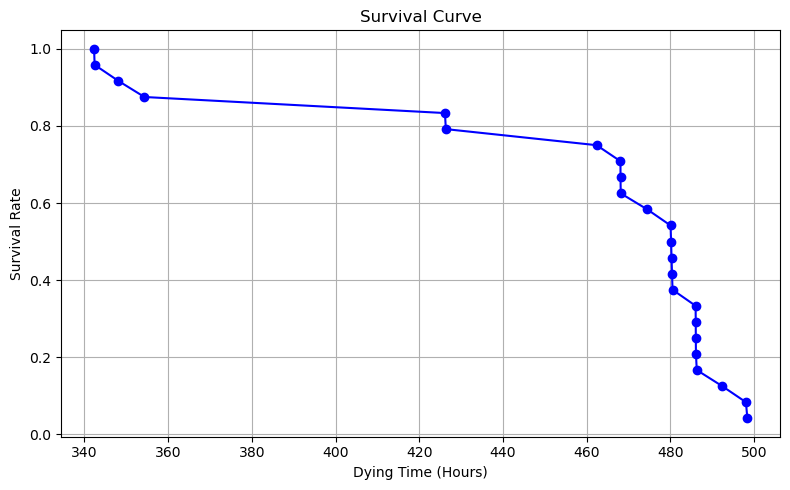

In [15]:
# Plot the survival curve
dying_times_sorted = sorted(dying_times) # Sort the dying times in ascending order

# Compute the survival rate
survival_rate = [1 - (i / len(dying_times_sorted)) for i in range(len(dying_times_sorted))]

# Plot the survival curve
plt.figure(figsize=(8, 5))
plt.plot(dying_times_sorted, survival_rate, marker='o', linestyle='-', color='blue')
plt.xlabel('Dying Time (Hours)')
plt.ylabel('Survival Rate')
plt.title('Survival Curve')
plt.grid()
plt.tight_layout()
plt.show()

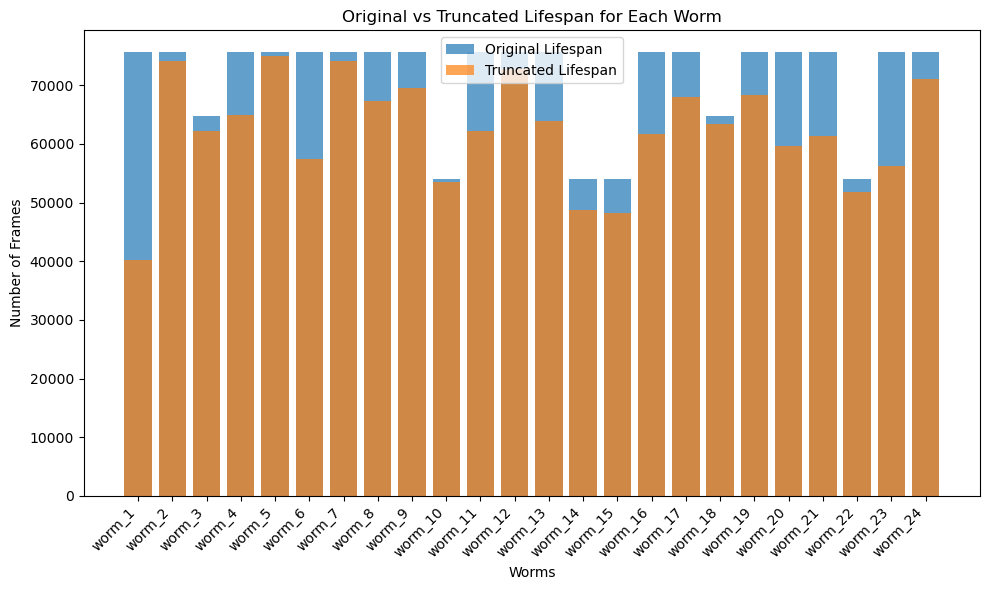

In [16]:
# Visualization

# Prepare data for the plot
original_lengths = [worms[name].shape[1] for name in worms.keys()]
truncated_lengths = [processed_worms[name].shape[1] for name in processed_worms.keys()]
worm_ids = list(worms.keys())

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(worm_ids, original_lengths, label='Original Lifespan', alpha=0.7)
plt.bar(worm_ids, truncated_lengths, label='Truncated Lifespan', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Worms')
plt.ylabel('Number of Frames')
plt.title('Original vs Truncated Lifespan for Each Worm')
plt.legend()
plt.tight_layout()
plt.show()

# Step 3 : Standardization
> Standardization ensures that all features are on the same scale, typically with a mean of 0 and a standard deviation of 1. This helps models converge faster and makes them less sensitive to the scale of input features.
> We should avoid standardizing categorical columns.

In [17]:
importlib.reload(helpers)

<module 'helpers' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/helpers.py'>

In [18]:
# Specify the indices of the features to standardize (e.g., Speed, X, Y)
feature_columns = [1, 2, 3, 4]  # Assuming 1 = Speed, 2 = X, 3 = Y, 4 = Changed Pixels, not standardizing the frame nummber = 0 and the catetgory = 5

# Apply per-worm standardization
standardized_worms = helpers.standardization(processed_worms, feature_columns)

In [19]:
# Retrieve the worm data
worm_3_data = standardized_worms['worm_3']  # Assuming worms is your dictionary of worm data

# Convert to a DataFrame for easier inspection
columns = ['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category']
df_worm_3 = pd.DataFrame(worm_3_data.T, columns=columns)  # Transpose for proper orientation

df_worm_3

,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,0.249554,0.414679,-0.196857,1.190372,0.0
1,2.0,-0.020378,1.098769,-0.273166,-0.164288,0.0
2,3.0,0.208377,1.090258,-0.270234,0.746221,0.0
3,4.0,0.554378,1.063578,-0.259618,2.100881,0.0
4,5.0,0.224910,1.003684,-0.249413,1.345825,0.0
...,...,...,...,...,...,...
62171,10402.0,-0.101358,0.075174,-1.240352,-0.475193,0.0
62172,10403.0,-0.090934,0.076531,-1.239227,-0.186495,0.0
62173,10404.0,0.038435,0.079458,-1.239044,0.812844,0.0
62174,10405.0,-0.123379,0.080574,-1.227790,-0.630646,0.0


# Step 4 : Splitting the Data
> Split the worms in train worms and test worms

In [20]:
train_worms, test_worms = load_data.split_worms(standardized_worms, test_size=0.2)

print(f"Training Worms: {list(train_worms.keys())}")
print(f"Testing Worms: {list(test_worms.keys())}")

Split 24 worms into 19 training and 5 testing worms.
Training Worms: ['worm_16', 'worm_6', 'worm_19', 'worm_24', 'worm_14', 'worm_11', 'worm_18', 'worm_12', 'worm_15', 'worm_17', 'worm_2', 'worm_13', 'worm_22', 'worm_7', 'worm_10', 'worm_3', 'worm_23', 'worm_5', 'worm_20']
Testing Worms: ['worm_8', 'worm_9', 'worm_1', 'worm_4', 'worm_21']


# Step 5 : Load only early Lifespan for train set and keep the whole lifespan for test (validation set)
> Now we will load only a portion of the worms

In [21]:
importlib.reload(load_data)

<module 'load_data' from '/Users/louistschanz/Documents/EPFL-Cours/MA1/ML/Project-2/ML-Project-2/load_data.py'>

In [22]:
data_fraction = 0.4

early_train_worms = load_data.load_earlylifespan(train_worms, data_fraction)

Truncated data to 40.0% of the lifespan for 19 worms.


In [23]:
# Retrieve the worm data
worm_3_data = early_train_worms['worm_3']  # Assuming worms is your dictionary of worm data

# Convert to a DataFrame for easier inspection
columns = ['Frame', 'Speed', 'X', 'Y', 'Changed Pixels', 'Category']
df_worm_3 = pd.DataFrame(worm_3_data.T, columns=columns)  # Transpose for proper orientation

df_worm_3

,Frame,Speed,X,Y,Changed Pixels,Category
0,1.0,0.249554,0.414679,-0.196857,1.190372,0.0
1,2.0,-0.020378,1.098769,-0.273166,-0.164288,0.0
2,3.0,0.208377,1.090258,-0.270234,0.746221,0.0
3,4.0,0.554378,1.063578,-0.259618,2.100881,0.0
4,5.0,0.224910,1.003684,-0.249413,1.345825,0.0
...,...,...,...,...,...,...
24865,4185.0,-0.082272,0.950402,1.130962,-0.364156,0.0
24866,4186.0,-0.083523,0.946761,1.131552,-0.297533,0.0
24867,4187.0,-0.010954,0.943164,1.131336,0.324278,0.0
24868,4188.0,-0.071037,0.932990,1.131223,0.857259,0.0


# Step 6 : Prepare data for Linear Models